<center><h1><u>Coursera Capstone Project</u></h1>

## About This Notebook:

[GitHub Repository](https://github.com/rmjmorgan/Coursera_Capstone "Coursera_Capstone")  
[Course Info](https://www.coursera.org/learn/applied-data-science-capstone "Applied Data Science Capstone")  

Created on 25th July 2020 by Rhys Morgan.  
This Jupyter notebook is mainly for the capstone project by IBM and Coursera.  

Bristol is a bustling city enveloped in the hills of South West England and straddling the River Avon. The centuries-old heritage and classical architecture give this place its own unmistakable identity. 

This notebook will investigate the relation between education and crime-rate in this city, to hopefully provide suggestions on how crime can be lowered.

### __Contents__

1. [The Problem](#problem)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results](#results)
6. [Discussion](#discussion)
7. [Conclusion](#conclusion)

---


### __The Problem__  <a name='problem'></a>
Bristol is generally a safe place. However, there is still moderate risk of petty crimes such as pickpocketing and robbery. The more built-up districts of the city have a generally higher rate of crime compared to lesser areas. This is due to many reasons, but my question for this report is: 
 __Does education directly affect crime rate in Bristol?__ 
    
Search engines would most certainly have multiple answers, accompanied by many arguments. However, I wish to explore this question __thoroughly__ with unbiased, publicly available data, and then go even deeper by looking at neighbourhoods individually and pinpointing locations that would greatly benefit from having a better education system. 

__A safer city will most definitely result in a better economy.__ Thus, being able to identify weak points in the system to better educate the population is a very powerful tool indeed. This investigation will cover all ages from nursery to university, as different age groups may provide insight into which stage(s) of education may be struggling the most. 

### __Data__ <a name='data'></a>
Python mostly owes it's popularity to it's huge array of community-made libraries. The sheer amount that's available with this language is jaw-dropping.  

Below are some of the more popular open-source libraries that will be used in this notebook. 

In [1]:
#import required libraries.
import numpy as np    #For the tools it has for arrays.
import pandas as pd    #To create and manipulate dataframes.
import json    #To read JSON files.
from geopy.geocoders import Nominatim    #To convert addresses to coordinates.
import requests    #To retrieve data from the Foursquare API.
import matplotlib as mpl    #The artist layer of matplotlib. For manipulating graphs.
import matplotlib.pyplot as plt    #The scripting layer of matplotlib. For premade functions.
import seaborn as sns    #For its regression function.
import matplotlib.cm as cm    #For its colourmaps.
import matplotlib.colors as colors    #For its array of colours.
from sklearn.cluster import KMeans    #Clustering algorithm.
import folium    #For its map and choropleth functions.
from folium import plugins    #For clustering markers.

print('All libraries imported.')

All libraries imported.


The data you see below was downloaded from Bristol's government website which you can find [here](https://opendata.bristol.gov.uk/explore/dataset/crime-recorded-by-police-by-selected-offence-groups-in-bristol-by-ward/information/?disjunctive.ward_name "Bristol Crime Data [2016-]").

The dataset __failed to work__ right out the box due to a column that I didn't even need - so I removed that column, resaved the CSV file, and pushed it to my __GitHub repository__ for you all to see.

In [2]:
#read the csv file into a Pandas dataframe, then display the first 5 rows.
Bristol_Crime_Data_df = pd.read_csv('Bristol_Crime_Data.csv')
Bristol_Crime_Data_df.head()

Ward Code               Ward Name  Time Period  \
0  E05010889             Bishopsworth     2016/17   
1  E05010906                   Knowle     2016/17   
2  E05010909                  Redland     2016/17   
3  E05010911  St George Troopers Hill     2016/17   
4  E05010914               Southville     2016/17   

   Latest Mid-Year Population Estimates for Ward  All Crimes (number)  \
0                                          11553                 1504   
1                                          13425                 1124   
2                                          13251                  790   
3                                           5891                  227   
4                                          12118                 2085   

   All Crimes (rate per 1000 ward population)  \
0                                  130.182637   
1                                   83.724395   
2                                   59.618142   
3                                   38.533356   
4                                  172.058095   

   Violent & Sexual Offences (number)  \
0                                 419   
1                                 362   
2                                 159   
3                                  68   
4                                 484   

   Violent & Sexual Offences (rate per 1000 ward population)  \
0                                          36.267636           
1                                          26.964618           
2                                          11.999094           
3                                          11.543032           
4                                          39.940584           

   Burglary (number)  Burglary (rate per 1000 ward population)  \
0                116                                 10.040682   
1                 91                                  6.778399   
2                135                                 10.187910   
3                 24                                  4.074011   
4                170                                 14.028718   

                    geo_point_2d  
0  51.4217865816, -2.61645797497  
1  51.4327758412, -2.57233571619  
2  51.4752437813, -2.60115989823  
3  51.4534343901, -2.53032305762  
4  51.4433202033, -2.60399275913

For the direction this notebook is going in, I'm going to need the __geographical coordinates of each ward__. The good news is that they're already in the dataset. The not-so-bad news is that I need to split them apart.

Luckily, Pandas makes this a trivial task. I start by separating the two coordinates by the comma in the middle into two new columns that I aptly name. I also drop the original column.

In [3]:
#concatinate the above dataframe with the new columns resulting from the split function.
df = pd.concat([Bristol_Crime_Data_df, Bristol_Crime_Data_df['geo_point_2d'].str.split(',', expand=True)], axis=1)

#remove the original "geo_point_2d" column.
df.drop(columns='geo_point_2d', inplace=True)

#rename the new columns to match the data they contain.
df.rename(columns={'Ward Name ':'Ward Name', 0:'Latitude', 1:'Longitude'}, inplace=True)
df.head()

Ward Code                Ward Name Time Period  \
0  E05010889             Bishopsworth     2016/17   
1  E05010906                   Knowle     2016/17   
2  E05010909                  Redland     2016/17   
3  E05010911  St George Troopers Hill     2016/17   
4  E05010914               Southville     2016/17   

   Latest Mid-Year Population Estimates for Ward  All Crimes (number)  \
0                                          11553                 1504   
1                                          13425                 1124   
2                                          13251                  790   
3                                           5891                  227   
4                                          12118                 2085   

   All Crimes (rate per 1000 ward population)  \
0                                  130.182637   
1                                   83.724395   
2                                   59.618142   
3                                   38.533356   
4                                  172.058095   

   Violent & Sexual Offences (number)  \
0                                 419   
1                                 362   
2                                 159   
3                                  68   
4                                 484   

   Violent & Sexual Offences (rate per 1000 ward population)  \
0                                          36.267636           
1                                          26.964618           
2                                          11.999094           
3                                          11.543032           
4                                          39.940584           

   Burglary (number)  Burglary (rate per 1000 ward population)       Latitude  \
0                116                                 10.040682  51.4217865816   
1                 91                                  6.778399  51.4327758412   
2                135                                 10.187910  51.4752437813   
3                 24                                  4.074011  51.4534343901   
4                170                                 14.028718  51.4433202033   

         Longitude  
0   -2.61645797497  
1   -2.57233571619  
2   -2.60115989823  
3   -2.53032305762  
4   -2.60399275913

It's also good practice to make sure that the columns are in the __correct formats__.

In [4]:
#show column formats.
df.dtypes

Ward Code                                                     object
Ward Name                                                     object
Time Period                                                   object
Latest Mid-Year Population Estimates for Ward                  int64
All Crimes (number)                                            int64
All Crimes (rate per 1000 ward population)                   float64
Violent & Sexual Offences (number)                             int64
Violent & Sexual Offences (rate per 1000 ward population)    float64
Burglary (number)                                              int64
Burglary (rate per 1000 ward population)                     float64
Latitude                                                      object
Longitude                                                     object
dtype: object

Fortunately, there's not much to change here. Just the two columns that I made.

In [5]:
#convert the formats of both columns to "float", which is the correct format for decimal numbers.
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype('float')

#### Foursquare API

This nifty tool from geospatial data company Foursquare will be used in this notebook to find __education-related buildings in all of Bristol.__ While the gathering of place names and locations is very useful, the __real__ value of this tool lies in its ability to retrieve metadata for every place it finds such as reviews, images, open hours.. you name it! However, while extra metadata would benefit this investigation, the amount of data to work with would sky-rocket, and because not every place has metadata, it would be extremely difficult and time-consuming to sift through them. As this project continues, I discover that I do not even need the extra information from Foursquare to come to a conclusion anyway.

To use the API, you need __private credentials,__ which is why they're hidden in the next cell.

In [6]:
#API access credentials.
CLIENT_ID = 'REDACTED'
CLIENT_SECRET = 'REDACTED'

#API version. Kept the same as the course labs for minimum compatibility issues.
VERSION = '20180605'

#Caps the amount of data retrieved from each API call.
LIMIT = 100

For ease of use, I created a new dataframe showing only what the API needs from the CSV file.

In [7]:
#The CSV file contains data of each ward for different years. They must be singled out to avoid problems in the future.
Bristol_Zones_df = df[['Ward Name', 'Latitude', 'Longitude']].drop_duplicates(subset=None, keep='first')

#Bristol as a whole is shown in the dataframe multiple times for each year. They contain missing values, but they won't affect this project. In this case, it's best to remove them.
Bristol_Zones_df.dropna(inplace=True)

#Removing rows will not automatically change the index, hence the line of code below.
#The "inplace=True" command you keep seeing tells Pandas to make the result of whatever the function was before it, a permanent change.
Bristol_Zones_df.reset_index(drop=True, inplace=True)
Bristol_Zones_df.head()

Ward Name   Latitude  Longitude
0             Bishopsworth  51.421787  -2.616458
1                   Knowle  51.432776  -2.572336
2                  Redland  51.475244  -2.601160
3  St George Troopers Hill  51.453434  -2.530323
4               Southville  51.443320  -2.603993

The function below utilises the __Foursquare API__ to retrieve data from every school, college, and university in Bristol. It then takes what it needs and stores it in a Pandas dataframe, ready for analysis.

In [8]:
#Names the new function and specifies the parameters.
def nearbySchools(names, latitudes, longitudes, radius=600):

    #A description of the function.
    '''
    This function uses Foursquare's API to find schools of all stages, along with their extended buildings, in a 600m radius around the specified geographical coordinates.
    You must pre-define your Foursquare API credentials (client ID and client secret), the API version, and the return limit. 
    
    Key information of each result is extracted and stored in a Pandas dataframe.
    '''

    #Filters the search results to only show data matching the category keys. These keys are for schools and colleges/universities, respectively.
    Categories = '4bf58dd8d48988d13b941735,4d4b7105d754a06372d81259'
    
    Schools_List = []    #An empty list, ready to be populated with the data retrieved from the API.
    
    #Calls the API for every ward in the above dataframe.
    for name, lat, lng in zip(names, latitudes, longitudes):
        URL = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
               CLIENT_ID,
               CLIENT_SECRET,
               lat,
               lng,
               VERSION,
               Categories,
               radius,
               LIMIT)
        
        Schools = requests.get(URL).json()['response']['venues']    #The data from the resulting JSON file is stored in a variable/dictionary. 
    
        #Loops through the dictionary and extracts relevent data from each search result. The information is then stored in the empty list created earlier.
        #One loop represents one row in the resulting dataframe.
        for i in range(len(Schools)):
            Schools_List.append([
                                name,
                                Schools[i]['name'],
                                Schools[i]['location']['lat'],
                                Schools[i]['location']['lng'],
                                Schools[i]['categories'][0]['name']
                              ])
    
    #Specify the dataframe column names, according to the data extracted from the API.
    Columns = ['Ward','School','School Latitude','School Longitude','School Category']
    
    #Converts the populated list into a dataframe.
    local_schools_df = pd.DataFrame(Schools_List, columns=Columns)
    
    #The output of this function is the new dataframe.
    return (local_schools_df)

Now the function needs to be called, using the dataframe created above.

In [9]:
NearbySchools = nearbySchools(Bristol_Zones_df['Ward Name'], Bristol_Zones_df.Latitude, Bristol_Zones_df.Longitude)
NearbySchools    #Displays the dataframe in its entirety. However, Pandas will truncate it if the dataframe is too large. 

Ward                            School  School Latitude  \
0         Bishopsworth              Bishopsworth Library        51.419068   
1         Bishopsworth  Bedminster Down Secondary School        51.422320   
2         Bishopsworth     St Peters School bishopsworth        51.417530   
3               Knowle                    Knowle Library        51.434223   
4               Knowle                             Arran        51.435455   
..                 ...                               ...              ...   
306      Windmill Hill       Bloodhound Education Centre        51.444061   
307  St George Central               Footsteps Playgroup        51.465015   
308  St George Central           Orchard Lea Day Nursery        51.461829   
309  St George Central                 Speedwell Nursery        51.465626   
310  St George Central            Bristol Brunel Academy        51.467687   

     School Longitude               School Category  
0           -2.616849               College Library  
1           -2.620947                   High School  
2           -2.616770                        School  
3           -2.566695               College Library  
4           -2.573173              Fraternity House  
..                ...                           ...  
306         -2.586576                  Trade School  
307         -2.524005  General College & University  
308         -2.524184     College Academic Building  
309         -2.532309                Nursery School  
310         -2.528173                   High School  

[311 rows x 5 columns]

### __Methodology__ <a name='methodology'></a>

We now have the data we need to start analysing. But before we begin, let's see a rundown of what to expect:

Part 1:  
- Create choropleth (heatmap) charts displaying the distribution of schools and crime-rate.
- Repeat for each year (from 2016 to 2020).
- Find out which ward has the most education-related buildings.
- Find out which ward has the highest crime-rate.

Part 2:
- Use a regression plot to attempt to find correlation.
- Use machine learning, more specifically, the KMeans algorithm, to cluster the different types of education-related buildings.
- Find out the most common types of school in each ward.

Part 3:
- Visualise the clusters.
- Show which cluster each ward belongs to.
- Discussion

### __Analysis__ <a name='analysis'></a>

This investigation heavily relies on the ability to map information relating to crime and education. Through trial and error, I found __Folium__ to be the best representation of my data. Folium is a Python library that, amongst other things, plots geospatial data. In other words, if you have data that is linked to areas in the world, Folium can be a great way of visualising the behaviour or distribution of your dataset.

Since this project focusses purely on Bristol and its wards, I will need to acquire the geographical coordinates of Bristol itself. This can be easily obtainable from a search engine, but it is worth using Python so that you can see its versatility.

In [10]:
#Define the address for Bristol.
address = 'Bristol, UK'

#Use the geolocator library to convert the address into lat-long coordinates.
geolocator = Nominatim(user_agent='Bristol_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#print the result.
print('The geographical coordinates of Bristol are {}, {}.'.format(
      latitude, longitude
     )
) 

The geographical coordinates of Bristol are 51.4538022, -2.5972985.


As we know, our crime data is recorded over multiple years. To truly understand the behaviour of crime rate, we will need to see maps of every year. So, to speed up the process of doing just that, I created a function that does all the heavy work of creating a choropleth map for us.

I also wanted to see every point on the map where there's an education-related building, so I added that too. Most of the points are densely packed together, so to make it look nicer, I clustered them. The clusters will split apart the closer you zoom in - eventually showing points of each place where, when you click them, will reveal more information. Try it out!

In [11]:
def education_crime_choropleth(crime_data, school_data, legend):
    
    '''
    A function that combines the processes of creating choropleth maps and 'clustered-point' maps together, for a cleaner script.
    You must provide a GeoJSON file for where you want the map to display.
    '''
    
    #Creates the base map that just shows the city of Bristol. The higher the "zoom_start" value, the closer the zoom.
    choroMap = folium.Map(location=[latitude, longitude], zoom_start=12)
    
    #Adds a choropleth chart on top of the base map.
    folium.Choropleth(
    geo_data=r'Bristol_Wards.geojson',                  #The file that determines the boundaries of each ward. Obtained from the Bristol government website.
    data=crime_data,                                    #The dataframe that will be used.
    columns=['Ward Name','All Crimes (number)'],        #The data that will be plotted. Ward names must match between this and the JSON file.
    key_on='feature.properties.name',                   #Where the boundary coordinates are stored in the JSON file.
    fill_color='YlOrRd',                                #Color will shift from yellow to orange to red, depending on the values in the dataset.
    fill_opacity=0.7,                                   #Sets mild transparency so that you can still see the road layouts and place names.
    line_opacity=0.2,                                   
    legend_name=legend                                  #A description for the colour distribution. Limits are automatically set.
    ).add_to(choroMap)                                  
    
    #Variable to store cluster information and displays them on top of the choropleth map.
    SchoolCluster = plugins.MarkerCluster().add_to(choroMap)

    #Loops through the school dataframe, plotting points on the map for each building.
    for lat, lng, label, ward in zip(school_data['School Latitude'], school_data['School Longitude'], school_data.School, school_data.Ward):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=(ward, label)      #Provides more information about each point when clicked.
            ).add_to(SchoolCluster) 
    
    return (choroMap)    #The final map is the output.

Great, now there's a function that we can call to create exactly what we want. All we need to do now is provide the data.

In [12]:
#Create a new dataset that removes the four "Bristol" entries in our original CSV file, so that the map is easier to read.
df_filter = df[df['Ward Name']!='Bristol'].reset_index(drop=True)

#Calls the new function to work with the data provided.
Bristol_map_1617 = education_crime_choropleth(crime_data = df_filter[df_filter['Time Period'] == '2016/17'],  #Only provides data from that time period.
                                              school_data = NearbySchools,
                                              legend = 'Crime Rate in Bristol [2016-17]')

#Displays the map.
Bristol_map_1617

Wonderful! From this map, we can see that central Bristol definitely had the __highest__ crime rate that year. Interestingly, it also has the __most__ education-related buildings.

Let's see what the other years have in store for us.

In [13]:
Bristol_map_1718 = education_crime_choropleth(crime_data = df_filter[df_filter['Time Period'] == '2017/18'],
                                              school_data = NearbySchools,
                                              legend = 'Crime Rate in Bristol [2017-18]')

Bristol_map_1718

In [14]:
Bristol_map_1819 = education_crime_choropleth(crime_data = df_filter[df_filter['Time Period'] == '2018/19'],
                                              school_data = NearbySchools,
                                              legend = 'Crime Rate in Bristol [2018-19]')

Bristol_map_1819

In [15]:
Bristol_map_1920 = education_crime_choropleth(crime_data = df_filter[df_filter['Time Period'] == '2019/20'],
                                              school_data = NearbySchools,
                                              legend = 'Crime Rate in Bristol [2019-20]')

Bristol_map_1920

Over the years, crime rate hasn't really changed that much. Apart from small fluctuations, most wards have kept their colour __consistent.__ But that's not all good. Central Bristol is still in the red zone.

Just out of interest, let's see now how many schools there are in each ward.

In [16]:
#counts each row where the ward names are the same and converts it to a dataframe.
schoolCount_df = NearbySchools.Ward.value_counts().to_frame()
schoolCount_df.reset_index(inplace=True)

#Fixes the column names that break as a result of filtering.
schoolCount_df.rename(columns={'index':'Ward',  'Ward':'No. of Schools'}, inplace=True)
schoolCount_df.head()

Ward  No. of Schools
0                 Central              47
1                  Cotham              47
2            Clifton Down              41
3  Hotwells & Harbourside              37
4                 Clifton              36

Pandas has already took the liberty of ordering the dataframe by number of schools. From this, we can see that __Cotham and Central rank the highest.__ Cotham is just outside central Bristol, however it's general crime rate is __low.__

What about ranking in terms of __total crime?__

In [17]:
#Pulls the relevant columns from the filtered dataframe from a given time period.
Bristol_Crime_1617 = df_filter[df_filter['Time Period'] == '2016/17'][['Ward Name','All Crimes (number)']]

#Renaming columns to be the same as in other dataframes allows us to merge two or more dataframes together.
Bristol_Crime_1617.rename(columns={'Ward Name':'Ward', 'All Crimes (number)':'Total Crimes'}, inplace=True)

#Sorts the dataframe by the values of a specified column.
Bristol_Crime_1617.sort_values(by=['Total Crimes'], ascending=False, inplace=True) 
Bristol_Crime_1617.reset_index(drop=True, inplace=True)
Bristol_Crime_1617.head()

Ward  Total Crimes
0                      Central          8088
1                Lawrence Hill          3549
2                       Ashley          3119
3       Hartcliffe & Withywood          2453
4  Avonmouth & Lawrence Weston          2397

We already knew about Central, but it's good to know the rest. I had expected to see the crime rate climb the closer it got to Central. But, it's not. In fact, it's fairly __sporadic.__

Let's see how many schools are in the highest ranking wards for crime.

In [18]:
#Combines the columns from both dataframes, using the "wards" column as a link.
Bristol_crime_vs_education_1617 = pd.merge(schoolCount_df, Bristol_Crime_1617)
Bristol_crime_vs_education_1617.sort_values(by=['Total Crimes'], ascending=False, inplace=True)
Bristol_crime_vs_education_1617.reset_index(drop=True, inplace=True)
Bristol_crime_vs_education_1617.head() 

Ward  No. of Schools  Total Crimes
0                 Central              47          8088
1           Lawrence Hill               7          3549
2                  Ashley               6          3119
3  Hartcliffe & Withywood               1          2453
4  Hotwells & Harbourside              37          2337

Using this new dataframe, let's try and find a pattern or correlation between them. I will use __Seaborn's__ regression line function but there are many other options.

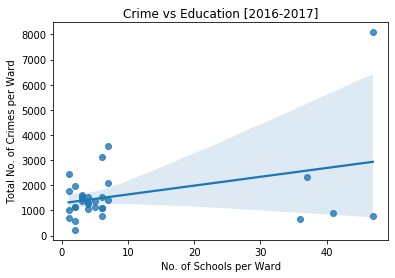

In [19]:
ax = sns.regplot(x='No. of Schools', y='Total Crimes', data=Bristol_crime_vs_education_1617)
ax.set(xlabel='No. of Schools per Ward', ylabel='Total No. of Crimes per Ward')
ax.set_title('Crime vs Education [2016-2017]')
plt.show()

Unfortunately, while the regression line does show a slight indication of positive correlation, it is __not enough__ to say for sure. Let's look at this from a different perspective.

What if we look at the __types__ of schools in the "high crime-rate" areas?

In [20]:
NearbySchools[NearbySchools.Ward == 'Central']['School Category'].value_counts()

College Residence Hall             9
College Science Building           6
College Academic Building          4
College Lab                        4
College Administrative Building    3
College Library                    3
General College & University       3
University                         3
Student Center                     3
College Auditorium                 2
College Engineering Building       2
Language School                    1
Community College                  1
College Math Building              1
College Gym                        1
Hospital                           1
Name: School Category, dtype: int64

Now then, we may be getting somewhere. Central is Bristol's highest-ranking ward for crime, and the only forms of education there are __universities and colleges.__

Let's see if there's a pattern there.

In [21]:
NearbySchools[NearbySchools.Ward == 'Lawrence Hill']['School Category'].value_counts()

College Math Building           2
Elementary School               2
College Academic Building       1
General College & University    1
College Arts Building           1
Name: School Category, dtype: int64

Similar story with Lawrence Hill. Mostly __high-level education__ buildings.

In [22]:
NearbySchools[NearbySchools.Ward == 'Ashley']['School Category'].value_counts()

University                   2
Community College            1
College Quad                 1
College Academic Building    1
High School                  1
Name: School Category, dtype: int64

Same goes for Ashley. But what about the lower-ranking areas?

In [23]:
NearbySchools[NearbySchools.Ward == 'Westbury-on-Trym & Henleaze']['School Category'].value_counts()

School               2
College Library      1
Elementary School    1
College Cafeteria    1
High School          1
College Lab          1
Name: School Category, dtype: int64

__Westbury-on-Trym & Henleaze__, one of the __lowest__-ranking areas in Bristol for crime-rate, and consists of mainly __high schools and elementary schools.__

In [24]:
NearbySchools[NearbySchools.Ward == 'Henbury & Brentry']['School Category'].value_counts()

School               2
Language School      1
Middle School        1
Elementary School    1
Name: School Category, dtype: int64

Again, __Henbury & Brentry__, very low crime-rate, and purely __high schools and elemetary schools.__

The point I'm trying to get across is that maybe, __just maybe,__ the fact that there's __only high-level education in the high crime-rate wards,__ without anywhere local for younger people to learn, may play a part in why the crime-rate is so high.

The regression plot did show a possitive correlation, however slight it was, right?

Of course there's also population and tourism to take into account. But a citizen's education can make a __big difference__ on how safe a place can be. 

To further cement this theory, [this article](https://www.bristol.gov.uk/documents/20182/35136/Crime+%26+Disorder+Strategic+Assessment.pdf/b56afc10-d3fb-49d4-b0c1-9f3521bae2ac#page=20&zoom=page-fit,-124,587 "Bristol Crime and Disorder Strategic Assessment") mentions the average person that gets arrested in Bristol is __33 years old.__ At that age, they should be in a stable job with a decent life. But instead, they're committing crime.

#### KMeans

This is a form of __machine learning__ that clusters categorical data together. You may have noticed that we have already clustered with the maps, but this takes it a step further by considering the types of schools, and distances to each other. Using this algorithm may provide more insight.

KMeans is one of the most popular machine learning techniques out there, and for good reason. But first we need to prepare our data.

KMeans will only work with categorical data that's in __numerical__ format - it __will not__ work with strings.

In [25]:
#Splits each category into separate columns in binary format. 1 is given to the category that describes that particular school. 0 if it doesn't.
Schools_onehot = pd.get_dummies(NearbySchools[['School Category']], prefix="", prefix_sep="")

#Adds the "Wards" column from a different dataframe, then moves it to the front - making it the first column.
Schools_onehot['Ward'] = NearbySchools.Ward
Schools_onehot = Schools_onehot[[list(Schools_onehot.columns)[-1]] + list(Schools_onehot.columns)[:-1]]
Schools_onehot.head()

Ward  Art Gallery  College & University  College Academic Building  \
0  Bishopsworth            0                     0                          0   
1  Bishopsworth            0                     0                          0   
2  Bishopsworth            0                     0                          0   
3        Knowle            0                     0                          0   
4        Knowle            0                     0                          0   

   College Administrative Building  College Arts Building  College Auditorium  \
0                                0                      0                   0   
1                                0                      0                   0   
2                                0                      0                   0   
3                                0                      0                   0   
4                                0                      0                   0   

   College Basketball Court  College Cafeteria  College Classroom  ...  \
0                         0                  0                  0  ...   
1                         0                  0                  0  ...   
2                         0                  0                  0  ...   
3                         0                  0                  0  ...   
4                         0                  0                  0  ...   

   Middle School  Music School  Nursery School  Preschool  School  \
0              0             0               0          0       0   
1              0             0               0          0       0   
2              0             0               0          0       1   
3              0             0               0          0       0   
4              0             0               0          0       0   

   Sorority House  Spiritual Center  Student Center  Trade School  University  
0               0                 0               0             0           0  
1               0                 0               0             0           0  
2               0                 0               0             0           0  
3               0                 0               0             0           0  
4               0                 0               0             0           0  

[5 rows x 49 columns]

We could work with this dataframe and be done with it, but it is __always good practice__ with KMeans to __normalise the data values first.__ This is because KMeans uses something called __Eulidean Distance__, which measures the distance between each centroid (a fixed point in a pre-determined location) and data point. The data point is clustered with the centroid it's __closest too.__ Therefore, normalising the data makes it __unbiased.__

In [26]:
Schools_grouped = Schools_onehot.groupby('Ward').mean().reset_index()
Schools_grouped.head()

Ward  Art Gallery  College & University  \
0                    Ashley          0.0                   0.0   
1                Bedminster          0.0                   0.0   
2  Bishopston & Ashley Down          0.0                   0.0   
3              Bishopsworth          0.0                   0.0   
4          Brislington West          0.0                   0.0   

   College Academic Building  College Administrative Building  \
0                   0.166667                              0.0   
1                   0.000000                              0.0   
2                   0.000000                              0.0   
3                   0.000000                              0.0   
4                   0.000000                              0.0   

   College Arts Building  College Auditorium  College Basketball Court  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   College Cafeteria  College Classroom  ...  Middle School  Music School  \
0                0.0           0.000000  ...            0.0      0.000000   
1                0.0           0.000000  ...            0.0      0.000000   
2                0.0           0.166667  ...            0.0      0.166667   
3                0.0           0.000000  ...            0.0      0.000000   
4                0.0           0.000000  ...            0.0      0.200000   

   Nursery School  Preschool    School  Sorority House  Spiritual Center  \
0             0.0        0.0  0.000000             0.0               0.0   
1             0.0        0.0  0.000000             0.0               0.0   
2             0.0        0.0  0.166667             0.0               0.0   
3             0.0        0.0  0.333333             0.0               0.0   
4             0.0        0.0  0.000000             0.0               0.0   

   Student Center  Trade School  University  
0             0.0           0.0    0.333333  
1             0.0           0.0    0.000000  
2             0.0           0.0    0.000000  
3             0.0           0.0    0.000000  
4             0.0           0.0    0.000000  

[5 rows x 49 columns]

In [27]:
#Define the number of centroids to deploy.
kclusters = 5

#Remove the "Wards" column as it's not numerical.
Schools_grouped_clustering = Schools_grouped.drop('Ward', 1)

#Apply the KMeans algorithm to the dataframe. "k-means++" places the centroids in a smart way. "n_init" is how many times the algorithm will loop.
#The centroids will move to the average distance to all assigned data points. Eventually they will stop moving because they are in a good enough position.
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=50, random_state=0).fit(Schools_grouped_clustering)

#Shows which cluster each data point is assigned to.
kmeans.labels_

array([2, 4, 4, 1, 4, 2, 2, 2, 2, 4, 4, 3, 2, 0, 1, 4, 1, 1, 2, 2, 4, 1,
       2, 2, 1, 2, 2, 1, 4, 2, 1, 1])

Great! But now it would be good if that array could be __integrated__ into a dataframe. Let's start by creating a dataframe that shows the __top 5 most common school categories in each ward.__

In [28]:
def most_common_school_types(row, limit):
    
    '''
    Quick function to sort school categories by descending order.
    '''
    row_categories = row.iloc[1:]    #Extracts the contents of the specified row.
    row_categories_sorted = row_categories.sort_values(ascending=False)   #Sorts the rows in descending order.
    
    #The sorted column is the output.
    return row_categories_sorted.index.values[0:limit]

In [29]:
#Limits the number of ranks.
limit = 5
indicators = ['st', 'nd', 'rd']    #Suffix for each rank.
columns = ['Ward']

#Loops through each category and orders them by frequency per ward.
for ind in np.arange(limit):
    try:
        columns.append('{}{} Most Common School Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common School Category'.format(ind+1))

#Sorts the wards.
ward_schools_sorted = pd.DataFrame(columns=columns)
ward_schools_sorted['Ward'] = Schools_grouped['Ward']

#Sorts the ranks.
for ind in np.arange(Schools_grouped.shape[0]):
    ward_schools_sorted.iloc[ind, 1:] = most_common_school_types(Schools_grouped.iloc[ind, :], limit)

ward_schools_sorted

Ward 1st Most Common School Category  \
0                        Ashley                      University   
1                    Bedminster               Elementary School   
2      Bishopston & Ashley Down               Elementary School   
3                  Bishopsworth                          School   
4              Brislington West               Elementary School   
5                       Central          College Residence Hall   
6                       Clifton          College Residence Hall   
7                  Clifton Down                  Student Center   
8                        Cotham       College Academic Building   
9                        Easton               Elementary School   
10                    Eastville               Community College   
11                      Filwood               Convention Center   
12                   Frome Vale               College Cafeteria   
13       Hartcliffe & Withywood                     College Gym   
14            Henbury & Brentry                          School   
15   Hengrove & Whitchurch Park       College Academic Building   
16                   Hillfields                  Student Center   
17                     Horfield            College & University   
18       Hotwells & Harbourside          College Residence Hall   
19                       Knowle                Fraternity House   
20                Lawrence Hill               Elementary School   
21                    Lockleaze                          School   
22                      Redland                     High School   
23                    Southmead                         Library   
24                   Southville               Elementary School   
25            St George Central       College Academic Building   
26      St George Troopers Hill                  Student Center   
27               St George West                          School   
28                    Stockwood               Elementary School   
29                 Stoke Bishop                      University   
30  Westbury-on-Trym & Henleaze                          School   
31                Windmill Hill                    Trade School   

   2nd Most Common School Category 3rd Most Common School Category  \
0                Community College       College Academic Building   
1                      High School                      University   
2                Community College                          School   
3                  College Library                     High School   
4                Community College                    Music School   
5         College Science Building       College Academic Building   
6                   Student Center    General College & University   
7           College Residence Hall       College Academic Building   
8         College Science Building           College Arts Building   
9     General College & University                      University   
10       College Academic Building               Elementary School   
11                      University                 College Theater   
12                      University       College Academic Building   
13                    Trade School                 College Stadium   
14                 Language School               Elementary School   
15               Elementary School                      University   
16                          School               Elementary School   
17                          School               Elementary School   
18                  Student Center               College Cafeteria   
19                 College Library                      University   
20           College Math Building       College Academic Building   
21               Elementary School               College Classroom   
22       College Academic Building              College Rec Center   
23                  Nursery School    General College & University   
24                      University                          Schoo

We had already seen four examples of the apparent effect of school types in districts. But now you can see them all! Notice how all lower-crime wards all tend to have __at least one low-tier school?__

Now to plot these clusters on a map.

In [30]:
Bristol_school_clusters = folium.Map(location=[latitude, longitude], zoom_start=13, tiles='cartodbpositron')

#Creates a list of different colours.
x = np.arange(kclusters)
y = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]    #Colour is converted to hex so that they work with Folium.

#Assigns colors to each cluster on the map. Then plots the chart.
markers_colors = []
for lat, lon, poi, cluster in zip(NearbySchools['School Latitude'], NearbySchools['School Longitude'], NearbySchools.Ward, kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Bristol_school_clusters)
       
Bristol_school_clusters

This visualises the clusters so it's easier to see the distribution of school types in Bristol. The map shows that the higher-tier schools tend to be __closer__ to Central than lower-tier schools.

For further detail, I will create a dataframe that shows which cluster each and every school building is assigned to.

### __Results__ <a name='results'></a>

Now we are at the stage where we can look at the facts and think about what we can take from them.

In [31]:
#Adds a column showing the clusters of each building to a previous dataframe.
ward_schools_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#A new dataframe is created so as not to lose the original.
Schools_merged = NearbySchools
Schools_merged = Schools_merged.merge(ward_schools_sorted)
Schools_merged

Ward                            School  School Latitude  \
0         Bishopsworth              Bishopsworth Library        51.419068   
1         Bishopsworth  Bedminster Down Secondary School        51.422320   
2         Bishopsworth     St Peters School bishopsworth        51.417530   
3               Knowle                    Knowle Library        51.434223   
4               Knowle                             Arran        51.435455   
..                 ...                               ...              ...   
306      Windmill Hill       Bloodhound Education Centre        51.444061   
307  St George Central               Footsteps Playgroup        51.465015   
308  St George Central           Orchard Lea Day Nursery        51.461829   
309  St George Central                 Speedwell Nursery        51.465626   
310  St George Central            Bristol Brunel Academy        51.467687   

     School Longitude               School Category  Cluster Labels  \
0           -2.616849               College Library               1   
1           -2.620947                   High School               1   
2           -2.616770                        School               1   
3           -2.566695               College Library               2   
4           -2.573173              Fraternity House               2   
..                ...                           ...             ...   
306         -2.586576                  Trade School               1   
307         -2.524005  General College & University               2   
308         -2.524184     College Academic Building               2   
309         -2.532309                Nursery School               2   
310         -2.528173                   High School               2   

    1st Most Common School Category 2nd Most Common School Category  \
0                            School                 College Library   
1                            School                 College Library   
2                            School                 College Library   
3                  Fraternity House                 College Library   
4                  Fraternity House                 College Library   
..                              ...                             ...   
306                    Trade School                          School   
307       College Academic Building                  Nursery School   
308       College Academic Building                  Nursery School   
309       College Academic Building                  Nursery School   
310       College Academic Building                  Nursery School   

    3rd Most Common School Category 4th Most Common School Category  \
0                       High School                      University   
1                       High School                      University   
2                       High School                      University   
3                        University                 College Theater   
4                        University                 College Theater   
..                              ...                             ...   
306                  Cooking School               Elementary School   
307    General College & University                     High School   
308    General College & University                     High School   
309    General College & University                     High School   
310    General College & University                     High School   

    5th Most Common School Category  
0                       College Gym  
1                       College Gym  
2                       College Gym  
3              College Soccer Field  
4              College Soccer Field  
..                              ...  
306    College Engineering Building  
307                      University  
308                      University  
309                      University  
310                      University  

[311 rows x 11 columns]

This is good and all but... what do these clusters even mean? Let's find out!

In [32]:
#All buildings in cluster 1.
Schools_merged.loc[Schools_merged['Cluster Labels'] == 0, :] 

Ward             School  School Latitude  \
187  Hartcliffe & Withywood  Merchants Academy        51.410237   

     School Longitude School Category  Cluster Labels  \
187         -2.613107     College Gym               0   

    1st Most Common School Category 2nd Most Common School Category  \
187                     College Gym                    Trade School   

    3rd Most Common School Category 4th Most Common School Category  \
187                 College Stadium            College Soccer Field   

    5th Most Common School Category  
187        College Science Building

In [33]:
#All buildings in cluster 2.
Schools_merged.loc[Schools_merged['Cluster Labels'] == 1, :] 

Ward                                    School  \
0                   Bishopsworth                      Bishopsworth Library   
1                   Bishopsworth          Bedminster Down Secondary School   
2                   Bishopsworth             St Peters School bishopsworth   
13                    Southville              Holy Cross Rc Primary School   
14                    Southville              Compass Point Primary School   
15                    Southville           Dockyard. Creative Hub + Coffee   
16                    Southville                             HH Wells Labs   
17                    Southville                                   Include   
18                    Southville       Lewis Wing, Wills Memorial Building   
19                    Southville       Spike Island (Art Centre & Gallery)   
145            Henbury & Brentry                           Language school   
146            Henbury & Brentry              Henbury Court Primary School   
147            Henbury & Brentry                            Henbury School   
148            Henbury & Brentry                           brentry nursery   
149            Henbury & Brentry                            Blaise Primary   
150                   Hillfields                          Briarwood School   
151                   Hillfields                   Minerva Primary Academy   
152                   Hillfields                    Bristol Brunel Academy   
153                   Hillfields                      Hillfield Baby Group   
154  Westbury-on-Trym & Henleaze                         Red Maids' School   
155  Westbury-on-Trym & Henleaze                          Badminton School   
156  Westbury-on-Trym & Henleaze              St Ursula's. An E-ACT School   
157  Westbury-on-Trym & Henleaze                                Урок Химии   
158  Westbury-on-Trym & Henleaze                               Dining Hall   
159  Westbury-on-Trym & Henleaze           Westbury On Trym Primary School   
160  Westbury-on-Trym & Henleaze                            School Library   
178               St George West                        Summerhill Academy   
198                    Lockleaze                    Purdown BT Transmitter   
199                    Lockleaze                 Stoke Park Primary School   
200                    Lockleaze               The Lodge - Priory Hospital   
201                    Lockleaze              Filton Avenue Infanty School   
295                     Horfield             St. Teresa's Catholic Academy   
296                     Horfield                            Orchard School   
297                     Horfield                              St John Hall   
298                     Horfield                    Horfield C of E School   
301                Windmill Hill              Victoria Park Primary School   
302                Windmill Hill                            Little Kitchen   
303                Windmill Hill  St. Mary Redcliffe C Of E Primary School   
304                Windmill Hill                         Bristol Hackspace   
305                Windmill Hill                    S&B Automotive Academy   
306                Windmill Hill               Bloodhound Education Centre   

     School Latitude  School Longitude                  School Category  \
0          51.419068         -2.616849                  College Library   
1          51.422320         -2.620947                      High School   
2          51.417530         -2.616770                           School   
13         51.443853         -2.599627                Elementary School   
14         51.438425         -2.603009                Elementary School   
15         51.447592         -2.609527                College Cafeteria   
16         51.447102         -2.599967                       University   
17         51.441077         -2.600098                           School   
18         51.449047         -2.603805                       Law School   
1

In [34]:
#All buildings in cluster 3.
Schools_merged.loc[Schools_merged['Cluster Labels'] == 2, :] 

Ward                    School  School Latitude  \
3               Knowle            Knowle Library        51.434223   
4               Knowle                     Arran        51.435455   
5              Redland  St. Bonaventure's School        51.477758   
6              Redland      Redland Green School        51.473540   
7              Redland  Bishop Road School Field        51.480698   
..                 ...                       ...              ...   
300       Stoke Bishop           Trinity College        51.476801   
307  St George Central       Footsteps Playgroup        51.465015   
308  St George Central   Orchard Lea Day Nursery        51.461829   
309  St George Central         Speedwell Nursery        51.465626   
310  St George Central    Bristol Brunel Academy        51.467687   

     School Longitude               School Category  Cluster Labels  \
3           -2.566695               College Library               2   
4           -2.573173              Fraternity House               2   
5           -2.597445                   High School               2   
6           -2.603400                   High School               2   
7           -2.595603            College Rec Center               2   
..                ...                           ...             ...   
300         -2.628839                    University               2   
307         -2.524005  General College & University               2   
308         -2.524184     College Academic Building               2   
309         -2.532309                Nursery School               2   
310         -2.528173                   High School               2   

    1st Most Common School Category 2nd Most Common School Category  \
3                  Fraternity House                 College Library   
4                  Fraternity House                 College Library   
5                       High School       College Academic Building   
6                       High School       College Academic Building   
7                       High School       College Academic Building   
..                              ...                             ...   
300                      University          College Residence Hall   
307       College Academic Building                  Nursery School   
308       College Academic Building                  Nursery School   
309       College Academic Building                  Nursery School   
310       College Academic Building                  Nursery School   

    3rd Most Common School Category 4th Most Common School Category  \
3                        University                 College Theater   
4                        University                 College Theater   
5                College Rec Center                  Nursery School   
6                College Rec Center                  Nursery School   
7                College Rec Center                  Nursery School   
..                              ...                             ...   
300                    Trade School                 College Stadium   
307    General College & University                     High School   
308    General College & University                     High School   
309    General College & University                     High School   
310    General College & University                     High School   

    5th Most Common School Category  
3              College Soccer Field  
4              College Soccer Field  
5                        University  
6                        University  
7                        University  
..                              ...  
300            College Soccer Field  
307                      University  
308                      University  
309                      University  
310                      University  

[239 rows x 11 columns]

In [35]:
#All buildings in cluster 4.
Schools_merged.loc[Schools_merged['Cluster Labels'] == 3, :] 

Ward                    School  School Latitude  School Longitude  \
197  Filwood  Knowle West Media Centre        51.425299          -2.59352   

       School Category  Cluster Labels 1st Most Common School Category  \
197  Convention Center               3               Convention Center   

    2nd Most Common School Category 3rd Most Common School Category  \
197                      University                 College Theater   

    4th Most Common School Category 5th Most Common School Category  
197            College Soccer Field        College Science Building

In [36]:
#All buildings in cluster 5.
Schools_merged.loc[Schools_merged['Cluster Labels'] == 4, :] 

Ward  \
20                    Stockwood   
161    Bishopston & Ashley Down   
162    Bishopston & Ashley Down   
163    Bishopston & Ashley Down   
164    Bishopston & Ashley Down   
165    Bishopston & Ashley Down   
166    Bishopston & Ashley Down   
173                  Bedminster   
174                  Bedminster   
175                   Eastville   
176                   Eastville   
177                   Eastville   
179            Brislington West   
180            Brislington West   
181            Brislington West   
182            Brislington West   
183            Brislington West   
184                      Easton   
185                      Easton   
186                      Easton   
188  Hengrove & Whitchurch Park   
189  Hengrove & Whitchurch Park   
190               Lawrence Hill   
191               Lawrence Hill   
192               Lawrence Hill   
193               Lawrence Hill   
194               Lawrence Hill   
195               Lawrence Hill   
196               Lawrence Hill   

                                                School  School Latitude  \
20                                    Waycroft Academy        51.412947   
161                         Bishop Road Primary School        51.480038   
162                                      Bobby's Place        51.482452   
163                          Ashley Down Infant School        51.483632   
164                        Brunel Field Primary School        51.478412   
165                                              B2.20        51.478022   
166       City of Bristol College - Ashley Down Centre        51.477220   
173                                 Ashton Park School        51.440339   
174                            Luckwell Primary School        51.437276   
175  Bristol Turkish Community T.C Diyanet Egitim M...        51.472684   
176                        Bristol Childrens Playhouse        51.472280   
177                                    St Matthias PRU        51.477669   
179                    Holymead Primary School (Lower)        51.436455   
180                  Bristol School Of Performing Arts        51.433343   
181         Piano Lessons in Bristol with Jack Vaughan        51.437012   
182                                           Holymead        51.437514   
183                        Holymead Primary Upper Site        51.438313   
184                            City of Bristol Academy        51.459096   
185                           whitehall primary school        51.464865   
186                      Bannerman road primary school        51.464148   
188                       South Bristol Skills Academy        51.410819   
189                           Wandsdyke Primary School        51.406964   
190                                        Screenology        51.450515   
191                                             Kaplan        51.452205   
192                         Hannah More Primary School        51.453976   
193                                     Kaplan Bristol        51.452126   
194                              Easton Primary School        51.456860   
195            St Nicholas of Tolentine Primary School        51.459971   
196                                Barton Hill Academy        51.453911   

     School Longitude               School Category  Cluster Labels  \
20          -2.545628             Elementary School               4   
161         -2.593917             Elementary School               4   
162         -2.585923                  Music School               4   
163         -2.584845                        School               4   
164         -2.582722             Elementary School               4   
165         -2.580910             College Classroom               4   
166         -2.581335             Community College               4   
173         -2.630206                   High School               4   
174         -2.612720             Elementary School               4   
175         -2.

### __Discussion__ <a name='discussion'></a>

The analysis and results has shown that all 32 wards of Bristol __share a common trait__ - that is, they all seem to __behave the same__ when it comes to what type of school appears the most, comapared to the rate of crime. We have found that wards with more crime records have __higher-level education__ (colleges, universities etc.). Whereas, the "safer" wards have __lower-level education__ (nursery, elementary, high). If there truly is a relation between them (and not just coincidence), would it not be a good idea to have schools for younger ages in places with high crime, for example, __Central?__ It sounds counter-intuitive seeing as there would obviously be more tourism and high-rise businesses closer to the center of a city, but seeing as the other wards have significantly lower crime, it may not be such a bad idea.

The youths who live in Central must travel to other wards, __far from home__ to even get an education in the first place. Bristol already has a big traffic problem, hence the diesel car ban coming in 2021, you can read more about that [here](https://news.sky.com/story/bristol-bans-diesel-cars-from-2021-in-bid-to-improve-air-quality-11855120 "Bristol Bans Diesel Cars From 2021 in bid to Improve Air Quality"). The point is that __there's more traffic than there needs to be__ in Bristol due to __children travelling far to get to school.__ Would it not be safer for everyone if there were more local schools, especially in Central?

Then there's the economic side of the spectrum. Some families __simply cannot afford__ to send their children to schools using busses, trains etc. Yes, it would __cost money__ to maintain more schools in Bristol's center. However, I would say that it __outweighs__ the money lost due to crime every day. Businesses are forced to invest in tighter security measures, and there's demand for __more working class__ people. A brand-new high school is due to open in Lockleaze by 2021, but looking at the results of this report, was that the best spot to put a new school? There's already a decent selection there, and crime rate is one of the lowest in the city.

On the other hand, I can certainly understand the appeal to parents for sending their children to safer places to learn. Given the decision, it would be very difficult to ignore that fact. The __reputation__ of a school also plays a part in this, as well as the __resources and teaching ability__ available to pupils.

### __Conclusion__ <a name='conclusion'></a>

So that's it. I starting this project hoping to find out that education directly affects crime rate in Bristol and ended up knowing that education really is just __one of so many aspects__ to consider. It's a conundrum - __crime rate would decrease__ with the presence of __lower-level education__ in wards that don't have them, but it's __easier said than done.__ 

Python was used here to try and tackle my question, and I can say I'm __satisfied with the answer.__ I always knew it would be __open-ended,__ but with the help of the visualisations and results, I can understand the problem much more clearly, and thus apply this report to as many other cites (even countries!) as I desire. I used Bristol because I'm familiar with it, so it was easier to work with, but this behaviour would most likely be the same in __any other city in the UK.__

The report itself __went quite well,__ considering. There were __many hurdles due to my inexperience,__ but they were eventually fixed. One big hurdle in particular was using the __Foursquare API__ to find the schools. If I were using it for venues such as stadiums or restaurants, I would probably have __much more information__ to work with. As I was building the function to search for all schools in the city, I found that I __couldn't acquire__ information on addresses or reviews, simply because __not every place had that information.__ Foursquare definitely revealed its __limitations__ in this report, but I don't believe it hindered the outcome of this investigation.

Which finally leads me to what I would change next time round. I would consider venues that would __provide more metadata.__ I would also change my methods so that I could use __different visualisations and machine learning techniques,__ such as histograms and recommendation engines, just to see how they behave. And given the choice, I would use a __different API__ that maybe has more information, because Foursquare just __wasn't the best option__ for this particular investigation.

<center><h2>Thank you for reading!</h2>

<center>I am super new to data science (only 2 months to be exact!) and I worked really hard on this project, but I can tell I have a long way to go. I wanted to make this a simple read because I know how bored I get from reading books. More pictures, less writing and all.  
    <p></p>    
<center>Anyway, I hope this will be the start of many (much better) projects in the future. I have learned so much from this Coursera specialisation, and I know it will prove to be very beneficial to me one day. I hope you feel the same!